<b>Breast cancer is one of the deadly tumors in women, and its incidence continues to increase. This study aimed to identify novel therapeutic molecules using RNA sequencing (RNAseq) data of breast cancer from our hospitals.</b>

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from statsmodels.stats.multitest import multipletests
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

### Data Processing 

In [2]:
#Read the CVS file
data = pd.read_csv("GSE183947_fpkm.csv")
data.head()

,Unnamed: 0,CA.102548,CA.104338,CA.105094,CA.109745,CA.1906415,CA.1912627,CA.1924346,CA.1926760,CA.1927842,...,CAP.2040686,CAP.2046297,CAP.2046641,CAP.348981,CAP.354300,CAP.359448,CAP.94377,CAP.98389,CAP.98475,CAP.99145
0,TSPAN6,0.93,1.97,0.00,5.45,4.52,4.75,3.96,3.58,6.41,...,6.66,8.35,8.94,6.33,5.94,6.35,3.74,4.84,10.46,4.54
1,TNMD,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.23,0.39,...,0.12,0.17,1.08,0.29,0.00,0.07,9.19,1.18,0.09,0.39
2,DPM1,0.00,0.43,0.00,3.43,8.45,8.53,7.80,7.62,6.40,...,4.93,7.47,5.72,4.96,9.28,9.15,4.77,3.75,7.31,2.77
3,SCYL3,5.78,5.17,8.76,4.58,7.20,6.03,9.05,5.37,5.92,...,8.02,6.00,5.28,4.98,4.45,7.00,4.14,5.51,7.45,2.33
4,C1orf112,2.83,6.26,3.37,6.24,5.16,13.69,6.69,5.28,7.65,...,7.91,4.61,8.35,9.84,7.68,5.62,2.81,7.08,7.28,5.39


In [3]:
#Get the dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20246 entries, 0 to 20245
Data columns (total 61 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   20246 non-null  object 
 1   CA.102548    20246 non-null  float64
 2   CA.104338    20246 non-null  float64
 3   CA.105094    20246 non-null  float64
 4   CA.109745    20246 non-null  float64
 5   CA.1906415   20246 non-null  float64
 6   CA.1912627   20246 non-null  float64
 7   CA.1924346   20246 non-null  float64
 8   CA.1926760   20246 non-null  float64
 9   CA.1927842   20246 non-null  float64
 10  CA.1933414   20246 non-null  float64
 11  CA.1940640   20246 non-null  float64
 12  CA.2004407   20246 non-null  float64
 13  CA.2005288   20246 non-null  float64
 14  CA.2006047   20246 non-null  float64
 15  CA.2008260   20246 non-null  float64
 16  CA.2009329   20246 non-null  float64
 17  CA.2009381   20246 non-null  float64
 18  CA.2009850   20246 non-null  float64
 19  CA.2

In [4]:
#Separate cancerous and non-cancerous data
cancerous = data.iloc[:, 1:31]
non_cancerous = data.iloc[:, 31:]

In [5]:
#Get first 5 rows in cancerous sample
cancerous.head()

,CA.102548,CA.104338,CA.105094,CA.109745,CA.1906415,CA.1912627,CA.1924346,CA.1926760,CA.1927842,CA.1933414,...,CA.2040686,CA.2045012,CA.2046297,CA.348981,CA.354300,CA.359448,CA.94377,CA.98389,CA.98475,CA.99145
0,0.93,1.97,0.00,5.45,4.52,4.75,3.96,3.58,6.41,11.89,...,9.19,6.65,10.13,7.07,4.76,2.10,4.77,5.04,8.78,2.34
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.23,0.39,0.44,...,0.20,0.00,0.00,0.00,0.49,0.00,0.27,0.60,0.00,1.16
2,0.00,0.43,0.00,3.43,8.45,8.53,7.80,7.62,6.40,6.09,...,5.96,9.21,8.60,2.89,6.51,2.72,15.23,6.79,3.84,5.98
3,5.78,5.17,8.76,4.58,7.20,6.03,9.05,5.37,5.92,12.45,...,7.46,9.98,15.58,8.54,4.42,4.82,5.76,8.15,10.72,6.48
4,2.83,6.26,3.37,6.24,5.16,13.69,6.69,5.28,7.65,13.71,...,8.59,13.38,15.07,8.33,5.01,5.98,8.66,13.07,16.81,4.83


In [6]:
#Get first 5 rows in non-cancerous sample
non_cancerous.head()

,CAP.102548,CAP.104338,CAP.105094,CAP.109745,CAP.1906415,CAP.1912627,CAP.1924346,CAP.1926760,CAP.1927842,CAP.1933414,...,CAP.2040686,CAP.2046297,CAP.2046641,CAP.348981,CAP.354300,CAP.359448,CAP.94377,CAP.98389,CAP.98475,CAP.99145
0,11.66,3.40,13.38,14.95,6.70,0.00,10.45,7.10,5.21,5.61,...,6.66,8.35,8.94,6.33,5.94,6.35,3.74,4.84,10.46,4.54
1,5.79,1.76,0.24,1.81,0.35,0.00,0.00,0.20,11.43,0.26,...,0.12,0.17,1.08,0.29,0.00,0.07,9.19,1.18,0.09,0.39
2,0.00,8.87,10.64,9.18,6.60,0.00,7.85,4.19,0.44,9.96,...,4.93,7.47,5.72,4.96,9.28,9.15,4.77,3.75,7.31,2.77
3,7.68,1.26,7.30,8.49,3.60,8.71,4.24,6.07,5.47,4.30,...,8.02,6.00,5.28,4.98,4.45,7.00,4.14,5.51,7.45,2.33
4,23.32,3.11,7.00,10.36,5.37,5.43,3.90,6.29,14.61,3.81,...,7.91,4.61,8.35,9.84,7.68,5.62,2.81,7.08,7.28,5.39


### Exploratory Data Analysis (EDA)

In [7]:
#Descriptive statistics for cancerous data
cancerous.describe().round(2)

,CA.102548,CA.104338,CA.105094,CA.109745,CA.1906415,CA.1912627,CA.1924346,CA.1926760,CA.1927842,CA.1933414,...,CA.2040686,CA.2045012,CA.2046297,CA.348981,CA.354300,CA.359448,CA.94377,CA.98389,CA.98475,CA.99145
count,20246.00,20246.00,20246.00,20246.00,20246.00,20246.00,20246.00,20246.00,20246.00,20246.00,...,20246.00,20246.00,20246.00,20246.00,20246.00,20246.00,20246.00,20246.00,20246.00,20246.00
mean,24.86,25.68,21.16,24.94,22.81,24.31,25.31,25.00,25.67,24.52,...,25.99,27.87,25.25,24.12,27.75,28.58,26.75,23.87,21.70,26.20
std,452.21,658.18,115.60,291.71,412.42,327.71,560.29,298.34,259.54,258.44,...,492.89,366.29,377.20,285.27,471.92,571.95,264.46,275.51,130.58,741.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.27,0.32,0.00,0.93,0.78,0.85,0.74,0.98,0.82,0.98,...,0.94,0.90,0.90,0.98,0.64,0.78,0.63,0.93,0.82,0.91
50%,3.67,3.90,0.00,6.77,6.07,7.15,6.02,7.37,6.31,7.12,...,6.50,7.29,6.78,7.15,5.59,5.94,6.60,7.02,6.50,6.88
75%,16.67,17.16,8.39,21.93,18.90,22.59,19.00,22.84,20.87,21.72,...,20.22,23.43,21.13,21.70,19.07,22.20,21.81,20.88,20.08,21.21
max,62862.40,92774.67,6803.09,40052.57,57433.09,45745.88,78572.24,40829.40,34438.46,33930.11,...,68464.74,50719.44,52608.10,39229.67,65354.95,80686.37,34710.79,37452.30,14345.21,105082.38


In [8]:
#Descriptive statistics for non_concerous data
non_cancerous.describe().round(2)

,CAP.102548,CAP.104338,CAP.105094,CAP.109745,CAP.1906415,CAP.1912627,CAP.1924346,CAP.1926760,CAP.1927842,CAP.1933414,...,CAP.2040686,CAP.2046297,CAP.2046641,CAP.348981,CAP.354300,CAP.359448,CAP.94377,CAP.98389,CAP.98475,CAP.99145
count,20246.00,20246.00,20246.00,20246.00,20246.00,20246.00,20246.00,20246.00,20246.00,20246.00,...,20246.00,20246.00,20246.00,20246.00,20246.00,20246.00,20246.00,20246.00,20246.00,20246.00
mean,22.07,25.08,24.37,24.09,25.05,24.25,25.61,26.11,20.14,24.52,...,26.61,26.96,26.80,26.17,23.39,28.03,21.33,25.19,24.92,28.10
std,97.84,264.49,152.65,149.40,342.02,142.91,335.28,210.07,179.20,272.21,...,472.22,278.59,366.95,275.65,153.53,292.34,153.72,276.80,149.77,555.01
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,3.85,0.32,0.97,1.18,0.96,0.00,0.97,1.11,3.53,0.86,...,1.06,0.99,1.02,0.90,0.55,0.89,0.19,1.12,1.12,0.83
50%,8.12,4.81,7.73,8.09,6.83,0.08,6.73,7.28,6.45,6.60,...,6.90,7.35,7.20,6.72,5.84,7.16,4.44,7.40,7.49,5.86
75%,16.97,17.44,21.98,22.35,20.39,9.46,20.35,21.90,12.40,19.17,...,20.93,21.38,21.36,21.54,18.32,22.40,15.33,21.50,21.36,19.27
max,5143.31,32076.52,17540.97,17856.16,46987.02,11855.03,45806.41,26736.31,16784.64,36099.05,...,65782.73,36781.20,50243.67,36869.18,17370.96,38829.42,17267.71,37100.21,15842.07,77660.46


In [9]:
#Define a function to perform the t-test
def compare_columns(group1, group2):
    comparison_results = {}
    for col1, col2 in zip(group1.columns, group2.columns):
        t_stat, p_value = ttest_ind(group1[col1], group2[col2])
        comparison_results[(col1, col2)] = {"t_statistic": t_stat, "p_value": p_value}
    return comparison_results

#Perform the comparison for each group
comparison_results = compare_columns(cancerous, non_cancerous)

#Print the comparison results
for pair, result in comparison_results.items():
    print(f"Comparison for columns {pair}: t-statistic = {result['t_statistic']}, p-value = {result['p_value']}")


Comparison for columns ('CA.102548', 'CAP.102548'): t-statistic = 0.8579359759458305, p-value = 0.39093289574912327
Comparison for columns ('CA.104338', 'CAP.104338'): t-statistic = 0.12120101333526853, p-value = 0.9035324229339369
Comparison for columns ('CA.105094', 'CAP.105094'): t-statistic = -2.3904051762526706, p-value = 0.01683433617163374
Comparison for columns ('CA.109745', 'CAP.109745'): t-statistic = 0.3688332033684334, p-value = 0.7122539826102698
Comparison for columns ('CA.1906415', 'CAP.1906415'): t-statistic = -0.593904387082022, p-value = 0.5525793824996823
Comparison for columns ('CA.1912627', 'CAP.1912627'): t-statistic = 0.022910438449748438, p-value = 0.9817218267990515
Comparison for columns ('CA.1924346', 'CAP.1924346'): t-statistic = -0.0664017345573138, p-value = 0.9470583171169742
Comparison for columns ('CA.1926760', 'CAP.1926760'): t-statistic = -0.43603569441412937, p-value = 0.6628131567200403
Comparison for columns ('CA.1927842', 'CAP.1927842'): t-statist

The t-test is a statistical test used to determine if there is a significant difference between the means of two groups. In this context, we use it to compare the gene expression levels between the cancerous and non-cancerous groups for each gene. The t-statistic measures the difference between the means of the two groups relative to the variance in the data, while the p-value indicates the probability of observing the data if the null hypothesis (no difference between the groups) is true. A low p-value suggests that the difference in gene expression levels between the two groups is unlikely to be due to random chance, indicating a potentially significant difference.

In [10]:
#Extract p-values from t-test results
p_values = [result["p_value"] for result in comparison_results.values()]

#Apply FDR correction
adjusted_p_values = multipletests(p_values, method="fdr_bh")[1]

#Update t-test results with adjusted p-values
for i, gene in enumerate(comparison_results):
    comparison_results[gene]["adjusted_p_value"] = adjusted_p_values[i]

#Filter significant genes based on adjusted p-value threshold
significant_genes = [gene for gene, result in comparison_results.items() if result["adjusted_p_value"] < 0.05]
print("Significantly differentially expressed genes (after FDR correction):", significant_genes)


Significantly differentially expressed genes (after FDR correction): []


The absence of significant results after applying multiple testing correction suggests that none of the adjusted p-values were found to be lower than the conventional threshold of 0.05.

### Feature Engineering 

In [13]:
#Apply K-means clustering
k=4 #Set number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(data.iloc[:, 1:])

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


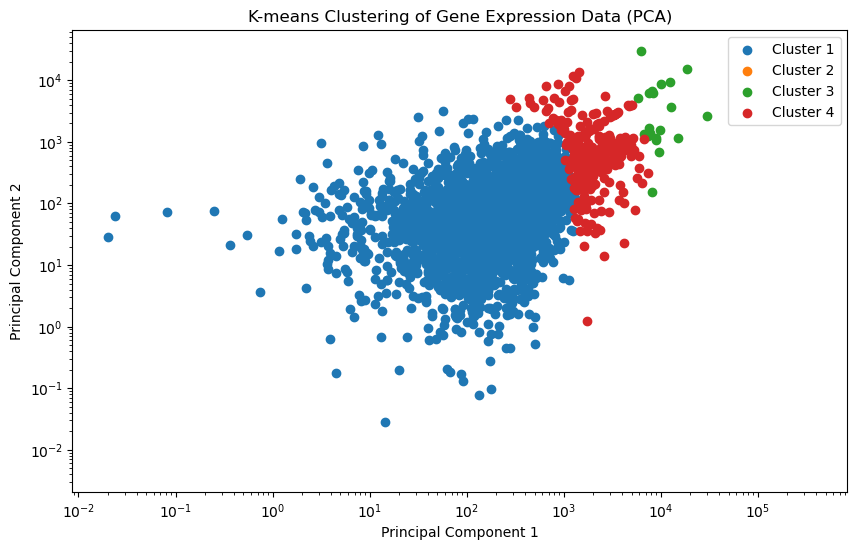

In [14]:
#Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data.iloc[:, 1:])

#Plot the clusters
plt.figure(figsize=(10, 6))
for cluster in range(k):
    plt.scatter(data_pca[clusters == cluster, 0], data_pca[clusters == cluster, 1], label=f"Cluster {cluster+1}")
plt.title("K-means Clustering of Gene Expression Data (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

### Model Evaluation 

In [15]:
from sklearn.metrics import silhouette_score

# Compute the silhouette score
silhouette_avg = silhouette_score(data.iloc[:, 1:], clusters)

print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.9151248240760904


A silhouette score of 0.915 suggests a remarkable degree of separation between clusters, indicating that the clustering algorithm effectively grouped samples based on their gene expression profiles. Each cluster contains similar samples while being distinct from others, implying clear patterns in the data.

In [17]:
from sklearn.metrics import davies_bouldin_score

# Compute the Davies-Bouldin Index
dbi_score = davies_bouldin_score(data.iloc[:, 1:], clusters)
print("Davies-Bouldin Index:", dbi_score)

Davies-Bouldin Index: 0.8526595887979885


The Davies-Bouldin Index (DBI) of 0.8527 suggests that the clusters generated by the K-means algorithm exhibit relatively good separation, with low intra-cluster distances and high inter-cluster distances. This indicates that the clusters are distinct and well-defined, contributing to the effectiveness of the clustering algorithm in capturing the underlying structure of the data. 